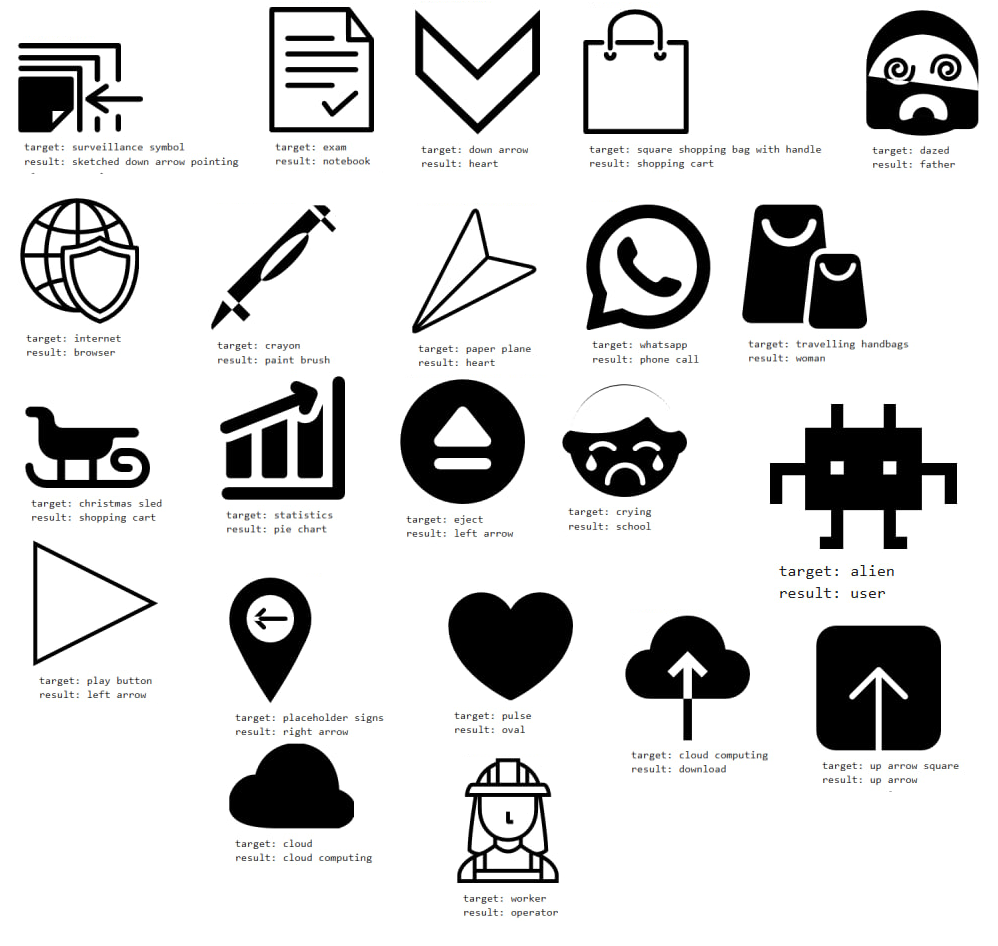

# SVG Text Description Sample

In [1]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from nltk.tokenize import WordPunctTokenizer
from subword_nmt.apply_bpe import BPE

from model import *
import svg_converter as converter

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device.type

'cpu'

### Data

In [3]:
def tokenize(x):
    return ' '.join(tokenizer.tokenize(x.lower()))

def get_svg_paths(folders):
    svg_paths = []

    for i, folder in enumerate(folders):
        files = [file for file in os.listdir(folder)]

        for file in files:
            svg_name = file[:-4] # del ".svg"
            svg_name = svg_name.strip()
                
            svg_name = tokenize(svg_name)
            svg_name = filenames_bpe.process_line(svg_name)

            svg_path = os.path.join(folder, file)

            svg_paths.append([svg_name, svg_path])

    return svg_paths

In [4]:
dataset_path = 'dataset2k'
tokenizer = WordPunctTokenizer()

In [5]:
filenames_bpe = BPE(open('checkpoints/bpe_rules_model_0.1.fnt'))

In [6]:
folders = os.listdir(dataset_path)
folders = [os.path.join(dataset_path, foldername)
           for foldername in folders
           if os.path.isdir(os.path.join(dataset_path, foldername))]

print(len(folders))

svg_paths = np.array(get_svg_paths(folders))

2000


In [7]:
len(svg_paths), svg_paths[:5]

(134395,
 array([['off@@ ices s@@ che@@ me', 'dataset2k/scheme/offices scheme.svg'],
        ['blo@@ cks s@@ che@@ me of three shapes',
         'dataset2k/scheme/blocks scheme of three shapes.svg'],
        ['pyrami@@ d s@@ che@@ me', 'dataset2k/scheme/pyramid scheme.svg'],
        ['b@@ lock s@@ che@@ me of ba@@ si@@ c geo@@ me@@ tri@@ cal shapes',
         'dataset2k/scheme/block scheme of basic geometrical shapes.svg'],
        ['b@@ lock s@@ che@@ me of four ba@@ si@@ c geo@@ me@@ tri@@ c black shapes',
         'dataset2k/scheme/block scheme of four basic geometric black shapes.svg']],
       dtype='<U180'))

In [8]:
batch_size = 32
seq_len = 512

c = converter.Converter(seq_len)

dataset = SvgDataset(svg_paths, seq_len=seq_len, device=device)

dl = DataLoader(dataset, batch_size=batch_size, shuffle = True)

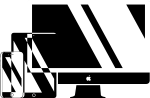

dev@@ ices tablet


In [9]:
for vec, tgt in dl:
    show(c, vec[0])
    print(tgt[0])
    break

### Eval

In [10]:
### W: legacy 0.1 - dynamic vocab_size
checkpoint = torch.load(f'checkpoints/checkpoint_model_0.1.pth', map_location=device)
vocab_size = len(checkpoint['vocab_tokens'])

model = STTModel(
    vocab_size=vocab_size,
    dim=32,
    seq_len=seq_len,
    n_heads=4,
    n_encoder_layers=1,
    n_decoder_layers=3,
    dropout_p=0.05
).to(device)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [11]:
save_path = "checkpoints"

load_checkpoint(model, opt, save_path, 'model', '0.1', device)

(1, {'train_loss': [], 'test_loss': []})

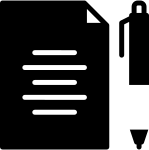

target: writing notebook
result: open book book


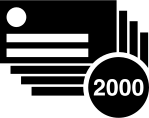

target: business cards stack of 2000 stationery for marketing
result: earth globe


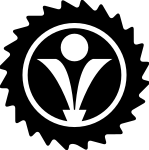

target: medal variant with spike edges and symbol at center
result: halloween skull


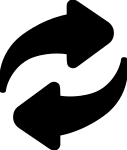

target: synchronization arrows couple
result: speech bubble


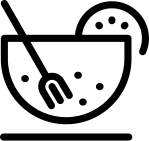

target: salad bowl
result: sun


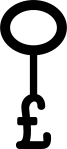

target: pound key shape with an oval
result: user


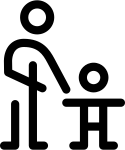

target: children care
result: hand and wrench


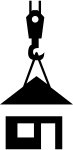

target: roof holding of a crane on prefabricated house
result: modern satellite


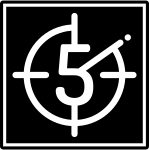

target: video player five
result: user


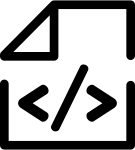

target: file coding
result: photo camera


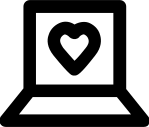

target: laptop love and romance
result: briefcase


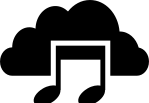

target: music on the cloud
result: south korea


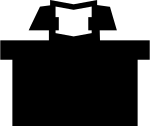

target: teacher reading a book sitting behind his desk
result: house


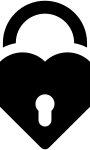

target: closed heart padlock
result: compact disc


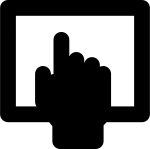

target: touch screen symbol in a circle
result: smartphone


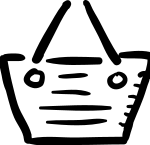

target: shopping basket
result: cactus


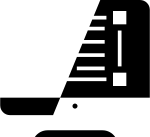

target: monitor seo and web
result: television


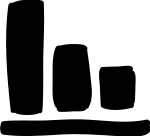

target: statistical chart
result: moustache


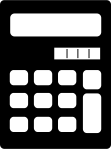

target: calculator tool variant
result: blackboard


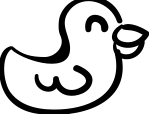

target: bird hand drawn animal toy
result: user


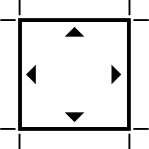

target: crosshair variant with navigation arrows
result: smartphone


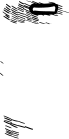

target: cellphone with heart
result: cloud computing


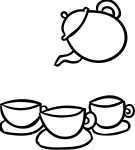

target: tea set
result: plant


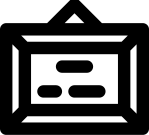

target: diploma business and finance
result: basket


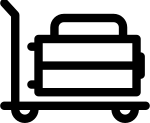

target: suitcases cart
result: desk


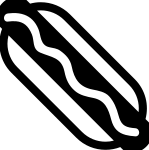

target: hot dog with sauce and bread
result: soccer


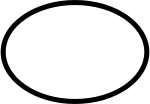

target: ellipse outline shape variant
result: reload


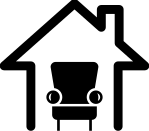

target: home interior symbol of a single sofa in a house outline
result: photo camera


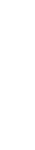

target: info circle
result: lifesaver


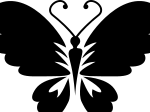

target: black butterfly top view with opened wings
result: female user


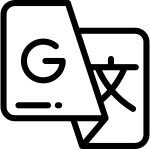

target: translate language
result: package


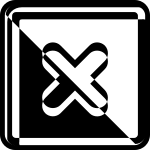

target: do not dry
result: book


In [12]:
sample(c, model, dl, device=device, p_value=0.4)

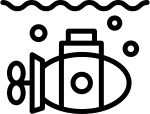

Predictions:

rocket
microphone
tap
pint of beer beer beer beer beer beer
coffee cup
coffee cup
christmas tree
man with tie
money
owl
emergency
owl
gift
medal
user
christmas tree
man
light bulb
airplane
bell
acoustic guitar
afro
medal
aquarium
gift
headphones
settings
medal
pint of beer beer beer beer beer beer
medal
sun
hair brush


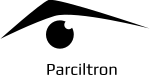

Predictions:

camcorder
beer
industrial robot
aqualung
satellite dish
money
industrial robot
sand castle
school
coffee cup
medal medal
coffee cup
bench
trophy
test tube
backpack
schedule
trophy
house
desk
truck
medal medal
ice cream
test tube
rake
truck
camcorder
bench
truck
chinese temple
medal medal
desk


In [58]:
paths = [
    "dataset2k/submarine/submarine.svg",
    "/home/grafstor/Documents/Design/parcilrtion.svg",
]
for path in paths:
    n = 32

    _, vector = c.to_vector(c.open(path), is_one_len=True)
    show(c, vector)

    results = predict(model,
            torch.tensor([vector]*n),
            device=device,
            p_value=0.25,
            max_length=15)

    print('Predictions:\n')

    for result in results:
        print(decode_bpe(result))

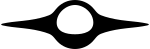

Predictions:

user
user
user
user
user
user
cloud computing
cloud computing
cloud computing
user
user
cloud computing
user
cloud computing
cloud computing
user
user
user
cloud computing
cloud computing
user
cloud computing
user
user
user
cloud computing
user
user
cloud computing
user
user
user


In [62]:
path = "/home/grafstor/Documents/Design/Group 7.svg"
n = 32

_, vector = c.to_vector(c.open(path), is_one_len=True)
show(c, vector)

results = predict(model,
        torch.tensor([vector]*n),
        device=device,
        p_value=0.1,
        max_length=15)

print('Predictions:\n')

for result in results:
    print(decode_bpe(result))